In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/heart-disease-uci/heart.csv


In [2]:
# reading the data and print out the number of records and attributes
df = pd.read_csv('../input/heart-disease-uci/heart.csv')
print(df.shape)

(303, 14)


In [3]:
# show the first 5 records of data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# check whether data has missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# check whether data has imbalanced targets
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [6]:
# check female and male counts
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Female count {:.1f}".format(countFemale))
print("Male count {:.1f}".format(countMale))

Female count 96.0
Male count 207.0


<AxesSubplot:>

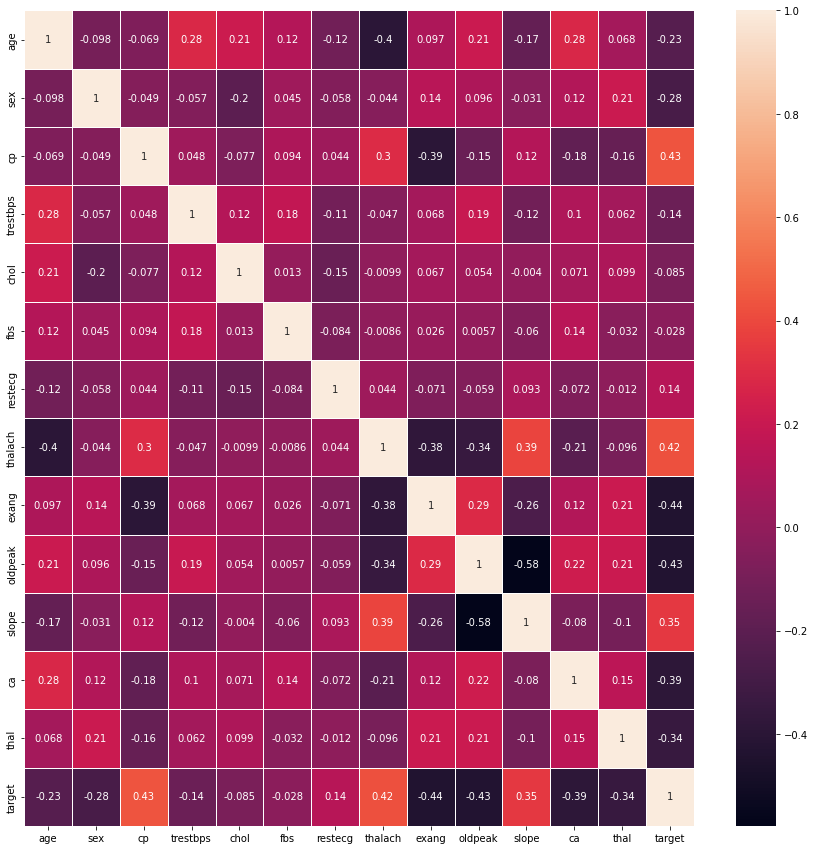

In [7]:
# plot the heat map to aorrelations of attributes
df.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True, linewidths=.5,ax=ax)

In [8]:
# separate the targets
y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [9]:
# normalize the attributes
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [10]:
# split training and testing data with ratio of 8: 2
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [11]:
# SVM with kernel = rbf, C = 1
accuracies = {}

svm = SVC(random_state = 1, kernel = 'rbf', C = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_train.T,y_train.T)*100
accuracies['SVM'] = acc
print("Train Accuracy of SVM Algorithm: {:.2f}%".format(acc))

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Train Accuracy of SVM Algorithm: 88.02%
Test Accuracy of SVM Algorithm: 83.61%


In [12]:
# SVM with kernel = rbf, C = 0.5
accuracies = {}

svm = SVC(random_state = 1, kernel = 'rbf', C = 0.5)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_train.T,y_train.T)*100
accuracies['SVM'] = acc
print("Train Accuracy of SVM Algorithm: {:.2f}%".format(acc))

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Train Accuracy of SVM Algorithm: 85.12%
Test Accuracy of SVM Algorithm: 81.97%


In [13]:
# SVM with kernel = rbf, C = 2
accuracies = {}

svm = SVC(random_state = 1, kernel = 'rbf', C = 2)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_train.T,y_train.T)*100
accuracies['SVM'] = acc
print("Train Accuracy of SVM Algorithm: {:.2f}%".format(acc))

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Train Accuracy of SVM Algorithm: 90.08%
Test Accuracy of SVM Algorithm: 88.52%


In [14]:
# SVM with kernel = linear, C = 1
accuracies = {}

svm = SVC(random_state = 1, kernel = 'linear', C = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_train.T,y_train.T)*100
accuracies['SVM'] = acc
print("Train Accuracy of SVM Algorithm: {:.2f}%".format(acc))

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Train Accuracy of SVM Algorithm: 84.30%
Test Accuracy of SVM Algorithm: 83.61%


In [15]:
# SVM with kernel = linear, C = 0.5
accuracies = {}

svm = SVC(random_state = 1, kernel = 'linear', C = 0.5)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_train.T,y_train.T)*100
accuracies['SVM'] = acc
print("Train Accuracy of SVM Algorithm: {:.2f}%".format(acc))

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Train Accuracy of SVM Algorithm: 83.88%
Test Accuracy of SVM Algorithm: 81.97%


In [16]:
# SVM with kernel = linear, C = 2
accuracies = {}

svm = SVC(random_state = 1, kernel = 'linear', C = 2)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_train.T,y_train.T)*100
accuracies['SVM'] = acc
print("Train Accuracy of SVM Algorithm: {:.2f}%".format(acc))

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Train Accuracy of SVM Algorithm: 84.30%
Test Accuracy of SVM Algorithm: 80.33%


In [17]:
# SVM with kernel = polynomial, C = 1
accuracies = {}

svm = SVC(random_state = 1, kernel = 'poly', C = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_train.T,y_train.T)*100
accuracies['SVM'] = acc
print("Train Accuracy of SVM Algorithm: {:.2f}%".format(acc))

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Train Accuracy of SVM Algorithm: 92.15%
Test Accuracy of SVM Algorithm: 86.89%


In [18]:
# SVM with kernel = polynomial, C = 0.5
accuracies = {}

svm = SVC(random_state = 1, kernel = 'poly', C = 0.5)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_train.T,y_train.T)*100
accuracies['SVM'] = acc
print("Train Accuracy of SVM Algorithm: {:.2f}%".format(acc))

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Train Accuracy of SVM Algorithm: 90.08%
Test Accuracy of SVM Algorithm: 85.25%


In [19]:
# SVM with kernel = polynomial, C = 2
accuracies = {}

svm = SVC(random_state = 1, kernel = 'poly', C = 2)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_train.T,y_train.T)*100
accuracies['SVM'] = acc
print("Train Accuracy of SVM Algorithm: {:.2f}%".format(acc))

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Train Accuracy of SVM Algorithm: 93.80%
Test Accuracy of SVM Algorithm: 83.61%


In [20]:
# SVM with kernel = sigmoid, C = 1
accuracies = {}

svm = SVC(random_state = 1, kernel = 'sigmoid', C = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_train.T,y_train.T)*100
accuracies['SVM'] = acc
print("Train Accuracy of SVM Algorithm: {:.2f}%".format(acc))

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Train Accuracy of SVM Algorithm: 75.21%
Test Accuracy of SVM Algorithm: 78.69%


In [21]:
# SVM with kernel = sigmoid, C = 0.5
accuracies = {}

svm = SVC(random_state = 1, kernel = 'sigmoid', C = 0.5)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_train.T,y_train.T)*100
accuracies['SVM'] = acc
print("Train Accuracy of SVM Algorithm: {:.2f}%".format(acc))

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Train Accuracy of SVM Algorithm: 75.62%
Test Accuracy of SVM Algorithm: 80.33%


In [22]:
# SVM with kernel = sigmoid, C = 2
accuracies = {}

svm = SVC(random_state = 1, kernel = 'sigmoid', C = 2)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_train.T,y_train.T)*100
accuracies['SVM'] = acc
print("Train Accuracy of SVM Algorithm: {:.2f}%".format(acc))

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Train Accuracy of SVM Algorithm: 71.90%
Test Accuracy of SVM Algorithm: 75.41%
